# Photovoltaics

As Moosh allows to compute quickly the absorption in each layer using the ```absorption``` function, it is possible to compute the current this would generate if we assume every charge carrier generated by every photon absorbed in the structure is finally captured and contributes to the current. This is here the short-circuit current which is computed, in these conditions. The conversion efficiency is the ratio of the short-circuit current to the the theoretical current generated by a perfectly absorbing material.

Here, we define the structure by artificially dividing the Silicon layer in two. This is not required, it is only to demonstrate that several absorbing layers can be handled at the same time. 


In [8]:
# Only for the present notebook... unnecessary 
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/code")

# Here it is !
from PyMoosh import *
import matplotlib.pyplot as plt

photovoltaic = Structure([1.,"SiA"],[0,1,1,0],[0,500,500,0])


List of materials:
Custom: 1.0
SIA


Now we call the ```Photo``` function. There are two active layers (1 and 2 since we artificially divided the active layer in two), which is simply specified by using a list of their numbers (```[1,2]```). 

In [9]:
efficiency,current,current_max,wl,spectrum,absorb = Photo(photovoltaic,0.,0.,375.,750.,[1,2],1000)

print("\n Conversion efficiency",efficiency,"\n Short-circuit current",current,"\n Theoretical max. current",current_max)



 Conversion efficiency 0.5956921306785686 
 Short-circuit current 13.744655994288012 
 Theoretical max. current 23.073422136080783


Now, we have a look at the solar spectrum and at the absorbance in the right layers. We plot the solar spectrum (AM 1.5) and the absorbance, which shows it is larger where the spectrum is not as high (but where the number of photons is larger, actually). 

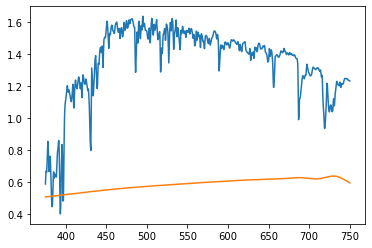

In [10]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(wl,spectrum)
plt.plot(wl,absorb)
plt.show()
